# Movies_Recommender (content_based)
##### -Mayank Srivastava

Dataset link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

>**Importing the Libraries & Loading the dataset**

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv files
movies =pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

- around 4800 movies and credits have been imported

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credits =credits.rename(columns ={'movie_id': 'id'})
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# merging the files
movies =movies.merge(credits, on = ['id','title'], how ='left')
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [8]:
movies.shape 

(4803, 22)

>**Data Cleaning**

In [9]:
# checking for null values
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

### About the Dataset Columns
- budget: The total financial allocation provided for the production of the movie, typically represented in US dollars.
- genres: The categories or types of movies, such as Action, Adventure, Sci-Fi, etc., often presented as a pipe-separated string.
- homepage: Lands on the movies' website's homepage.
- id: A unique identifier assigned to each movie for identification purposes within the dataset.
- keywords: Relevant words or phrases associated with the movie's content, themes, or key elements, usually provided as a pipe-separated string.
- original_language: The primary language in which the movie was originally produced and released.
- original_title: The original name of the movie as it was first released, without any translations or alterations.
- overview: A brief summary or synopsis of the movie's plot, providing an insight into its storyline.
- popularity: A numerical value representing the popularity of the movie, often calculated based on various factors such as views, ratings, and social media mentions.
- production_companies: The names of the companies involved in the production of the movie, typically listed as a pipe-separated string.
- production_countries: The countries where the movie was produced, usually listed as a pipe-separated string.
- release_date: The official date on which the movie was released to the public, typically in YYYY-MM-DD format.
- revenue: The total income generated by the movie from all sources, such as box office sales, streaming, and rentals, usually represented in US dollars.
- runtime: The total duration of the movie in minutes.
- spoken_languages: The languages spoken in the movie, often listed as a pipe-separated string.
- status: The current status of the movie, such as Released, Post Production, etc.
- title: The official name of the movie as it is commonly known to the public.
- vote_average: The average rating given to the movie by viewers, typically on a scale from 0 to 10.
- vote_count: The total number of votes or ratings received by the movie from viewers.
- cast: The main actors and actresses who performed in the movie, usually listed as a pipe-separated string.
- crew: The key personnel involved in the production of the movie, such as directors, producers, and composers, typically listed as a pipe-separated string.

In [10]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [11]:
# Dropping columns that are not needed for the Recommender System
# ['budget', 'homepage', 'original_language',
#       'original_title', 'popularity', 'production_companies',
#       'production_countries', 'release_date', 'revenue', 'runtime',
#       'spoken_languages', 'status', 'tagline',  'vote_average',
#       'vote_count']

In [12]:
movies =movies.drop(columns = ['budget', 'homepage', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline',  'vote_average',
       'vote_count'])

In [13]:
movies.head()

,genres,id,keywords,overview,title,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- To convert a string representation of a list into an actual Python list, we will use **ast.literal_eval** method from the **ast module.** 

In [14]:
# creating a helper function to fetch list of genres, keywords and cast
import ast
def make_list(data):
    data= ast.literal_eval(data)
    return([i['name'] for i in data])

In [15]:
movies.genres=movies.genres.apply(make_list)
movies.keywords=movies.keywords.apply(make_list)
movies.cast=movies.cast.apply(make_list)

In [16]:
# cleanign crew columns
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

- we need to fetch the Director's name, so the helper function needs to be modified slightly

In [17]:
def director(data):
    data= ast.literal_eval(data)
    for i in data:
        if i['job'] == 'Director':
            return(i['name'])

In [18]:
director(movies.crew[0])

'James Cameron'

In [19]:
movies.crew=movies.crew.apply(director)

In [20]:
movies.head()

,genres,id,keywords,overview,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


>**Feature Engineering**

In [21]:
# re-arranging the columns
movies.columns

Index(['genres', 'id', 'keywords', 'overview', 'title', 'cast', 'crew'], dtype='object')

In [22]:
movies =movies[['id','title','genres','keywords', 'overview','cast', 'crew']]

In [23]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


In [24]:
# changing list to string
movies.keywords =movies.keywords.str.join(' ')


In [25]:
movies.genres =movies.genres.str.join(' ')

In [26]:
# keeping only top 3 cast
movies.cast =movies.cast.apply(lambda x: x[:3])

# joining as string
movies.cast = movies.cast.str.join(' ')

In [27]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Sam Worthington Zoe Saldana Sigourney Weaver,James Cameron
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Johnny Depp Orlando Bloom Keira Knightley,Gore Verbinski
2,206647,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,A cryptic message from Bond’s past sends him o...,Daniel Craig Christoph Waltz Léa Seydoux,Sam Mendes
3,49026,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,Christian Bale Michael Caine Gary Oldman,Christopher Nolan
4,49529,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",Taylor Kitsch Lynn Collins Samantha Morton,Andrew Stanton


In [28]:
movies.isnull().sum()

id           0
title        0
genres       0
keywords     0
overview     3
cast         0
crew        30
dtype: int64

In [29]:
movies.columns

Index(['id', 'title', 'genres', 'keywords', 'overview', 'cast', 'crew'], dtype='object')

In [30]:
movies['tags']=movies.genres+" "+movies.keywords+" "+movies.overview+" "+movies.cast+" "+movies.crew

In [31]:
# changing all to lower case
movies.tags=movies.tags.str.lower()

In [32]:
#dropping other columns
movies.drop(columns = ['genres', 'keywords', 'overview', 'cast', 'crew'], inplace=True)

In [33]:
movies.isnull().sum()

id        0
title     0
tags     33
dtype: int64

In [34]:
# dropping nulss values
movies.dropna(subset =['tags'], inplace = True)

In [35]:
# final shape
movies.shape

(4770, 3)

In [36]:
# checking for duplicate movie names
movies[movies.title.duplicated(keep= False)]

,id,title,tags
972,72710,The Host,action adventure romance science fiction thril...
1359,268,Batman,fantasy action double life dc comics dual iden...
2877,1255,The Host,horror drama science fiction river mobile phon...
3647,39269,Out of the Blue,drama punk independent film coming of age teen...
3693,10844,Out of the Blue,drama new zealand gun rampage police independe...
4267,2661,Batman,family adventure comedy science fiction crime ...


    - all movies with the same title, have different tags, so they will be treated as unique records

>**Text - Vecotrization**
using Word-embeddings

In [37]:
import spacy
nlp = spacy.load('en_core_web_md')

we will use the attribute **.vector** to generate the Text vector for any NLP text

In [38]:
movies['vector']= movies.tags.apply(lambda x: nlp(x).vector)

In [39]:
movies.vector[0].shape

(300,)

- the tags have been converted into Text vectors, where each vectos has 300 elements

In [40]:
# creating a new Dataframe that will have each element in seperate column
vector= movies.vector.apply(lambda x: ", ".join([str(i) for i in x])).str.split(", ", expand = True)

In [41]:
vector.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.96456003,0.34265143,-1.6842436,-0.50285095,2.874125,0.11343249,1.8707184,2.6710434,-0.0001342821,-0.17954583,4.7603335,0.414949,-3.2439704,1.6322917,1.7798326,1.293499,2.3762605,0.41526043,-1.0445428,-1.1772914,1.1654795,0.090958245,-1.4807813,-0.5315935,0.2753276,-1.7888222,-2.2749622,-2.0895858,-0.43921152,1.4875782,0.2114491,-0.70300305,0.21113276,-1.9517562,-1.8269562,-0.61441624,-0.07066534,0.67680377,0.5545295,0.603334,-0.31476548,-0.3805692,0.37950858,0.42450026,-0.6291218,2.072836,-0.17871937,-1.7451319,0.5362071,1.284141,-0.88305604,1.4606154,0.10769803,-3.053467,-0.9656723,0.22662254,1.2140057,0.36897835,0.8945681,-0.11101073,-0.3580492,-0.9296859,-1.0591108,-1.9666612,1.3706813,2.1278753,-2.7501411,-3.029311,2.0146203,1.6330901,-0.63447213,0.41328388,-1.8905865,0.17592798,-0.077204235,1.0077004,-2.8604162,1.9777331,-2.2243626,-0.80635685,-3.921661,-1.0598563,0.821551,1.4645848,2.206936,0.55206364,-0.36660445,-2.297746,0.88931084,-1.2791601,-0.8467237,0.60436296,2.8090956,-3.875622,0.011173315,-1.5580883,1.1070566,0.05856737,0.37857652,0.21966435,1.8542533,1.2821093,2.886363,1.9231256,-0.3757339,3.0251958,1.7096014,-1.4340258,-0.4274203,-2.2585404,1.0736704,0.6884055,-2.0346198,1.1359291,0.49468827,0.23080042,-1.7238939,-1.1066489,0.9612483,-1.3663386,-0.8028748,-2.4163063,0.60470974,0.7767618,-0.71730185,-3.506491,1.4392974,-2.4043183,1.9657112,-1.3580875,-2.0236602,-0.21911334,3.1083174,-0.7644499,-1.1458893,0.3742775,-0.6741891,-0.24707337,1.5572025,-1.8158431,-1.7676833,-0.19769484,-0.47313747,2.265753,2.5124328,0.48392105,-4.3635626,0.32573664,0.6253432,1.3045892,-0.05619507,2.4254215,0.05641189,0.28263992,-0.75070274,1.4266217,3.338147,0.26916754,-0.65192986,-1.620122,-2.1929095,-2.6575093,0.031514827,1.2578464,-1.6442235,-1.76956,-2.777465,0.6212271,0.6073274,-1.0777158,0.46060348,0.0019452401,1.615595,0.20384324,1.9040576,-0.37846044,0.384358,0.26797944,-2.6404214,-1.4840168,-1.1528802,0.094055936,0.11512969,-1.233119,-0.70548266,1.3529464,-0.7833973,0.74946266,0.49647796,1.4110028,0.33466643,-1.8345398,-0.71700835,-1.3380855,0.63188285,-0.21543218,-2.1290586,0.55262715,-0.06274973,0.43558207,-0.29268187,-1.0771173,-1.140952,-1.3532524,1.5327249,0.4199816,-2.573269,1.0313637,-0.5988125,-0.80605966,1.9450523,1.0204164,-1.5030826,1.2522492,0.70534897,2.4847631,0.7176118,-1.6561829,0.5284689,-0.7912348,-1.4432206,1.3247542,-0.43560365,1.3513271,-1.6345569,-1.0420244,0.46082315,1.9186778,1.0970348,-0.71939486,2.7564442,-2.3460503,0.1077503,1.9201767,0.7436858,1.3268048,-1.7689856,0.58180994,-1.0785129,-0.34899566,-0.32798246,-0.21320388,0.83975464,0.051883664,-2.0220482,-0.24505241,-1.5099856,1.2845757,0.41369498,2.1565435,0.709248,-2.319418,-3.747843,-1.5119553,0.71099746,-2.1736097,1.1562467,0.35149354,-0.54156125,0.17397688,0.1537344,3.8566942,2.7019424,1.7019964,0.4422218,-0.36920935,-0.76565075,0.7692068,-2.2890534,0.61774415,1.25039

In [42]:
vector.shape

(4770, 300)

In [43]:
# Scaling the vector
vector_scaled= vector.copy()
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
vector_scaled = scaler.fit_transform(vector)

>**Text - Vecotrization**
using TF-IDF vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
X=movies[['id','title','tags']].copy()
from sklearn.feature_extraction import _stop_words
from nltk import stem
import re
wnl= stem.WordNetLemmatizer()
ps=stem.porter.PorterStemmer()
def standardize(text):
    
    # lower case
    text=text.lower()
    
    # remove punctuations
    doc= re.findall(r"\w+", text)
    
    # reoving undescores
    doc =[re.sub("_","",token) for token in doc]
    
    #removing stop_words
    doc = [token for token in doc if token not in list(_stop_words.ENGLISH_STOP_WORDS)]
    
    
    # lemmatize
    doc = [wnl.lemmatize(token) for token in doc]
    
    
    # stemmer
    doc = [ps.stem(token) for token in doc]
    return(' '.join(doc))

X.tags =X.tags.apply(standardize)
X.tags

0       action adventur fantasi scienc fiction cultur ...
1       adventur fantasi action ocean drug abus exot i...
2       action adventur crime spi base novel secret ag...
3       action crime drama thriller dc comic crime fig...
4       action adventur scienc fiction base novel mar ...
5       fantasi action adventur dual ident amnesia san...
6       anim famili hostag magic hors fairi tale music...
7       action adventur scienc fiction marvel comic se...
8       adventur fantasi famili witch magic broom scho...
9       action adventur fantasi dc comic vigilant supe...
10      adventur fantasi action scienc fiction save wo...
11      adventur action thriller crime kill undercov s...
12      adventur fantasi action witch fortun teller bo...
13      action adventur western texa hors survivor tex...
14      action adventur fantasi scienc fiction save wo...
15      adventur famili fantasi base novel fiction pla...
16      scienc fiction action adventur new york shield...
17      advent

In [46]:
tv = TfidfVectorizer(stop_words = 'english')
X.tags= tv.fit_transform(X.tags)


In [47]:
X.tags.toarray().shape

# the vector has 21536 terms for each movie

(4770, 21536)

>**Recommender system**

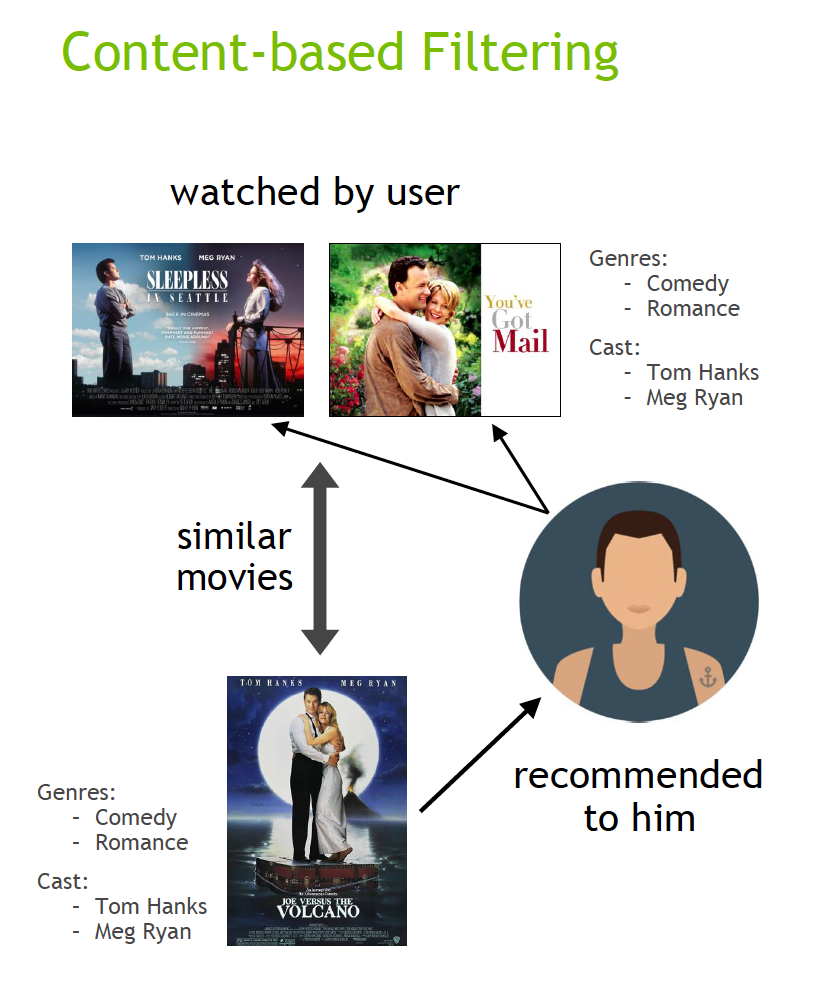

In [48]:
# Calulating the cosine similatity (0 to 1 where 1 = exact match)
from sklearn.metrics.pairwise import cosine_similarity

# Enter a movie

In [49]:
similarity = cosine_similarity(vector)
similarity_scaled = cosine_similarity(vector_scaled)

In [50]:
similarity.shape, similarity_scaled.shape

((4770, 4770), (4770, 4770))

In [51]:
def recommended(movie_name):
    idx = movies[movies.title == movie_name].index[0]
    movie_indices = np.argsort(similarity[idx])[-6:][::-1][1:]
    return movies.title.iloc[movie_indices]

In [52]:
# used recommended_scaled in webapp, as reuslts looked better than recommended
def recommended_scaled(movie_name):
    
    idx = movies[movies.title == movie_name].index[0]
    movie_indices = np.argsort(similarity_scaled[idx])[-6:][::-1][1:]
    return movies.title.iloc[movie_indices]

In [53]:
recommended_scaled('Avatar')

278                   Planet of the Apes
61                     Jupiter Ascending
2966               2001: A Space Odyssey
2433    Superman IV: The Quest for Peace
95                          Interstellar
Name: title, dtype: object

In [54]:
recommended('Avatar')

278                   Planet of the Apes
2433    Superman IV: The Quest for Peace
47               Star Trek Into Darkness
95                          Interstellar
539                           Titan A.E.
Name: title, dtype: object

In [55]:
# 'Superman II'
# 'Batman Begins'

In [56]:
import pickle

## Best Model
- tf-idf vectorization
- no scaling needed (data already b/w 0 to 1
- cosine similarity used

In [57]:
# similarity for tf-idf vectorization

In [58]:
X.tags.min(), X.tags.max()

(0.0, 0.7633663568169557)

In [59]:
similarity_tf = cosine_similarity(X.tags)

In [60]:
def recommended_tf(movie_name):
    idx = movies[movies.title == movie_name].index[0]
    movie_indices = np.argsort(similarity_tf[idx])[-6:][::-1][1:]
    return movies.title.iloc[movie_indices]

In [61]:
recommended_tf('Superman')

2433    Superman IV: The Quest for Peace
870                          Superman II
10                      Superman Returns
1296                        Superman III
14                          Man of Steel
Name: title, dtype: object

In [62]:
with open('similarity.pkl','wb') as f:
    pickle.dump(similarity_tf, f)

In [63]:
with open('movies.pkl','wb') as f:
    pickle.dump(movies, f)

In [73]:
def recommend(movie_name):
    idx = movies[movies.title == movie_name].index[0]
    movie_indices = np.argsort(similarity[idx])[-6:][::-1][1:]
    recommended_movies =[]
    movie_id =[]
    movie_poster= []
    for i in movies.iloc[movie_indices].title:
        recommended_movies.append(i)
    for i in movies.iloc[movie_indices].id:
        movie_id.append(i)
    return recommended_movies, movie_id

In [74]:
recommend('Batman')

(['Batman Begins',
  'The Dark Knight Rises',
  'The Musketeer',
  'Underworld: Rise of the Lycans',
  'Edge of Darkness'],
 [272, 49026, 11370, 12437, 12201])

In [ ]:
(['Batman Begins',
  'The Dark Knight Rises',
  'The Musketeer',
  'Underworld: Rise of the Lycans',
  'Edge of Darkness'],
 [272, 49026, 11370, 12437, 12201])

***